In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/Users/xiaoyvhe/Desktop/data练习/netflix1.csv')

In [146]:
df.head(5)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [147]:
df.info()
#there are not null value and the data is completed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [148]:
df.isna().sum()
# there is no nan value

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [149]:
df.duplicated().sum()
#there is no duplicated value in data

0

# Data Cleaning

In [150]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [151]:
df.rename(columns={'date_added':'date','listed_in':'category'},inplace=True)

In [152]:
df.head(5)

,show_id,type,title,director,country,date,release_year,rating,duration,category
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [153]:
df['Date']=pd.to_datetime(df['Date'])

KeyError: 'Date'

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date          8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   category      8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [155]:
df.describe()

,release_year
count,8790.000000
mean,2014.183163
std,8.825466
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


# Analysis Visualization

In [156]:
showtype = df['type'].value_counts().reset_index()

In [157]:
showtype

,index,type
0,Movie,6126
1,TV Show,2664


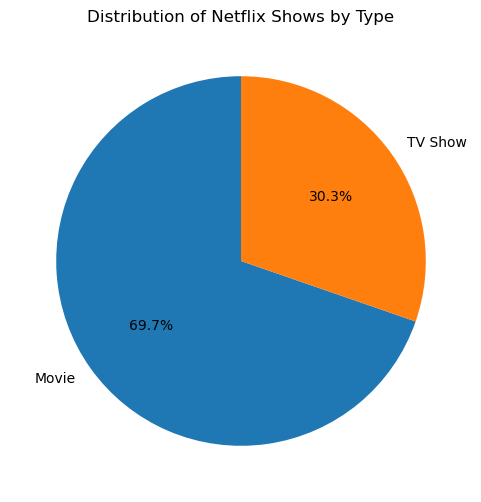

In [158]:
plt.figure(figsize=(20,6))
plt.pie(showtype['type'], labels=showtype['index'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Netflix Shows by Type')
plt.show()

In [159]:
df.head()

,show_id,type,title,director,country,date,release_year,rating,duration,category
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


# Director Count

In [160]:
directors = df['director'].value_counts()
directors.head(10)

Not Given                 2588
Rajiv Chilaka               20
Alastair Fothergill         18
Raúl Campos, Jan Suter      18
Suhas Kadav                 16
Marcus Raboy                16
Jay Karas                   14
Cathy Garcia-Molina         13
Martin Scorsese             12
Youssef Chahine             12
Name: director, dtype: int64

In [161]:
directors_given = directors.sum()- directors[0]
print(f'directors_given = {directors_given}')

directors_given = 6202


In [162]:
import plotly.graph_objects as go
fig = go.Figure(data = [go.Pie(labels = 
                              ["Directors Given",'Directors Not Given'],
                              values = [directors[0],directors_given],
                              title = 'Given Directors vs Not Given Directors',
                              marker = dict(colors =['green','pink']))])
fig.show()

# Country Counts

In [70]:
country_counts=df['country'].value_counts().head(20).reset_index(name='count')
country_counts.index = range(1,len(country_counts)+1)
country_counts

,index,count
1,United States,3240
2,India,1057
3,United Kingdom,638
4,Pakistan,421
5,Not Given,287
6,Canada,271
7,Japan,259
8,South Korea,214
9,France,213
10,Spain,182


<function matplotlib.pyplot.show(close=None, block=None)>

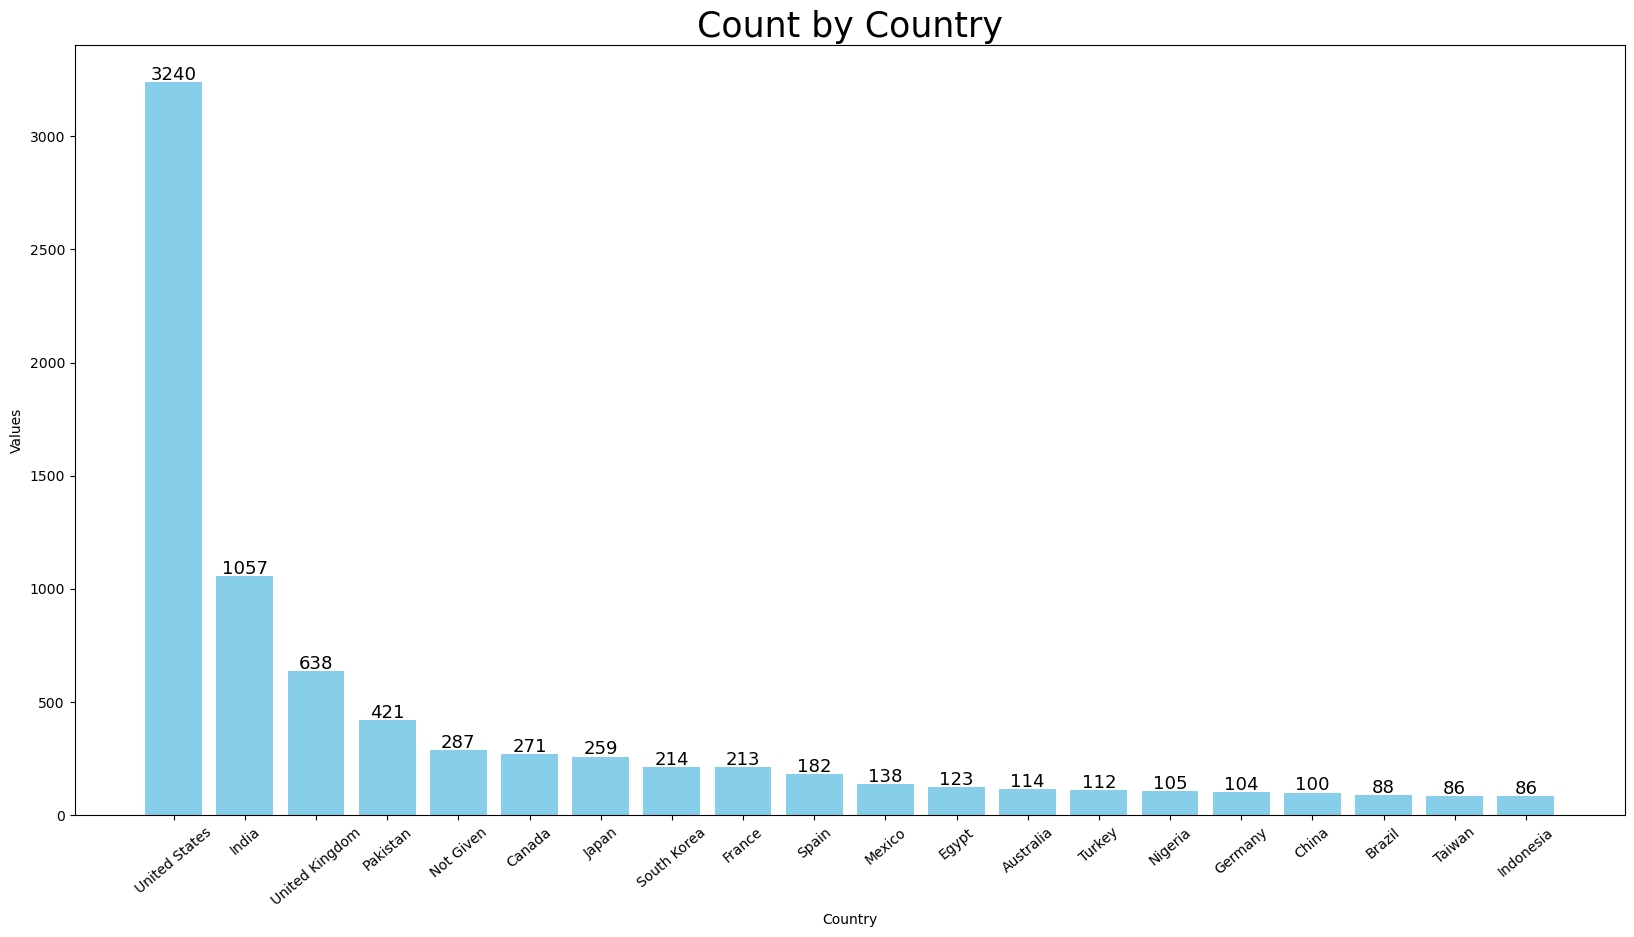

In [88]:
plt.figure(figsize = (20,10))
plt.bar(country_counts['index'],country_counts['count'],color = 'skyblue')
for i,count in enumerate(country_counts['count']):
    plt.text(i,count+10,str(count),ha='center',fontsize=13)
plt.xticks(rotation=40)
plt.xlabel('Country')
plt.ylabel('Values')
plt.title('Count by Country',fontsize =25)
plt.show

# Top 10 countries

In [91]:
country_counts_top10=df['country'].value_counts().head(10).reset_index(name='count')
country_counts_top10.index = range(1,len(country_counts_top10)+1)
country_counts_top10

,index,count
1,United States,3240
2,India,1057
3,United Kingdom,638
4,Pakistan,421
5,Not Given,287
6,Canada,271
7,Japan,259
8,South Korea,214
9,France,213
10,Spain,182


Text(0, 0.5, 'Number of Movies')

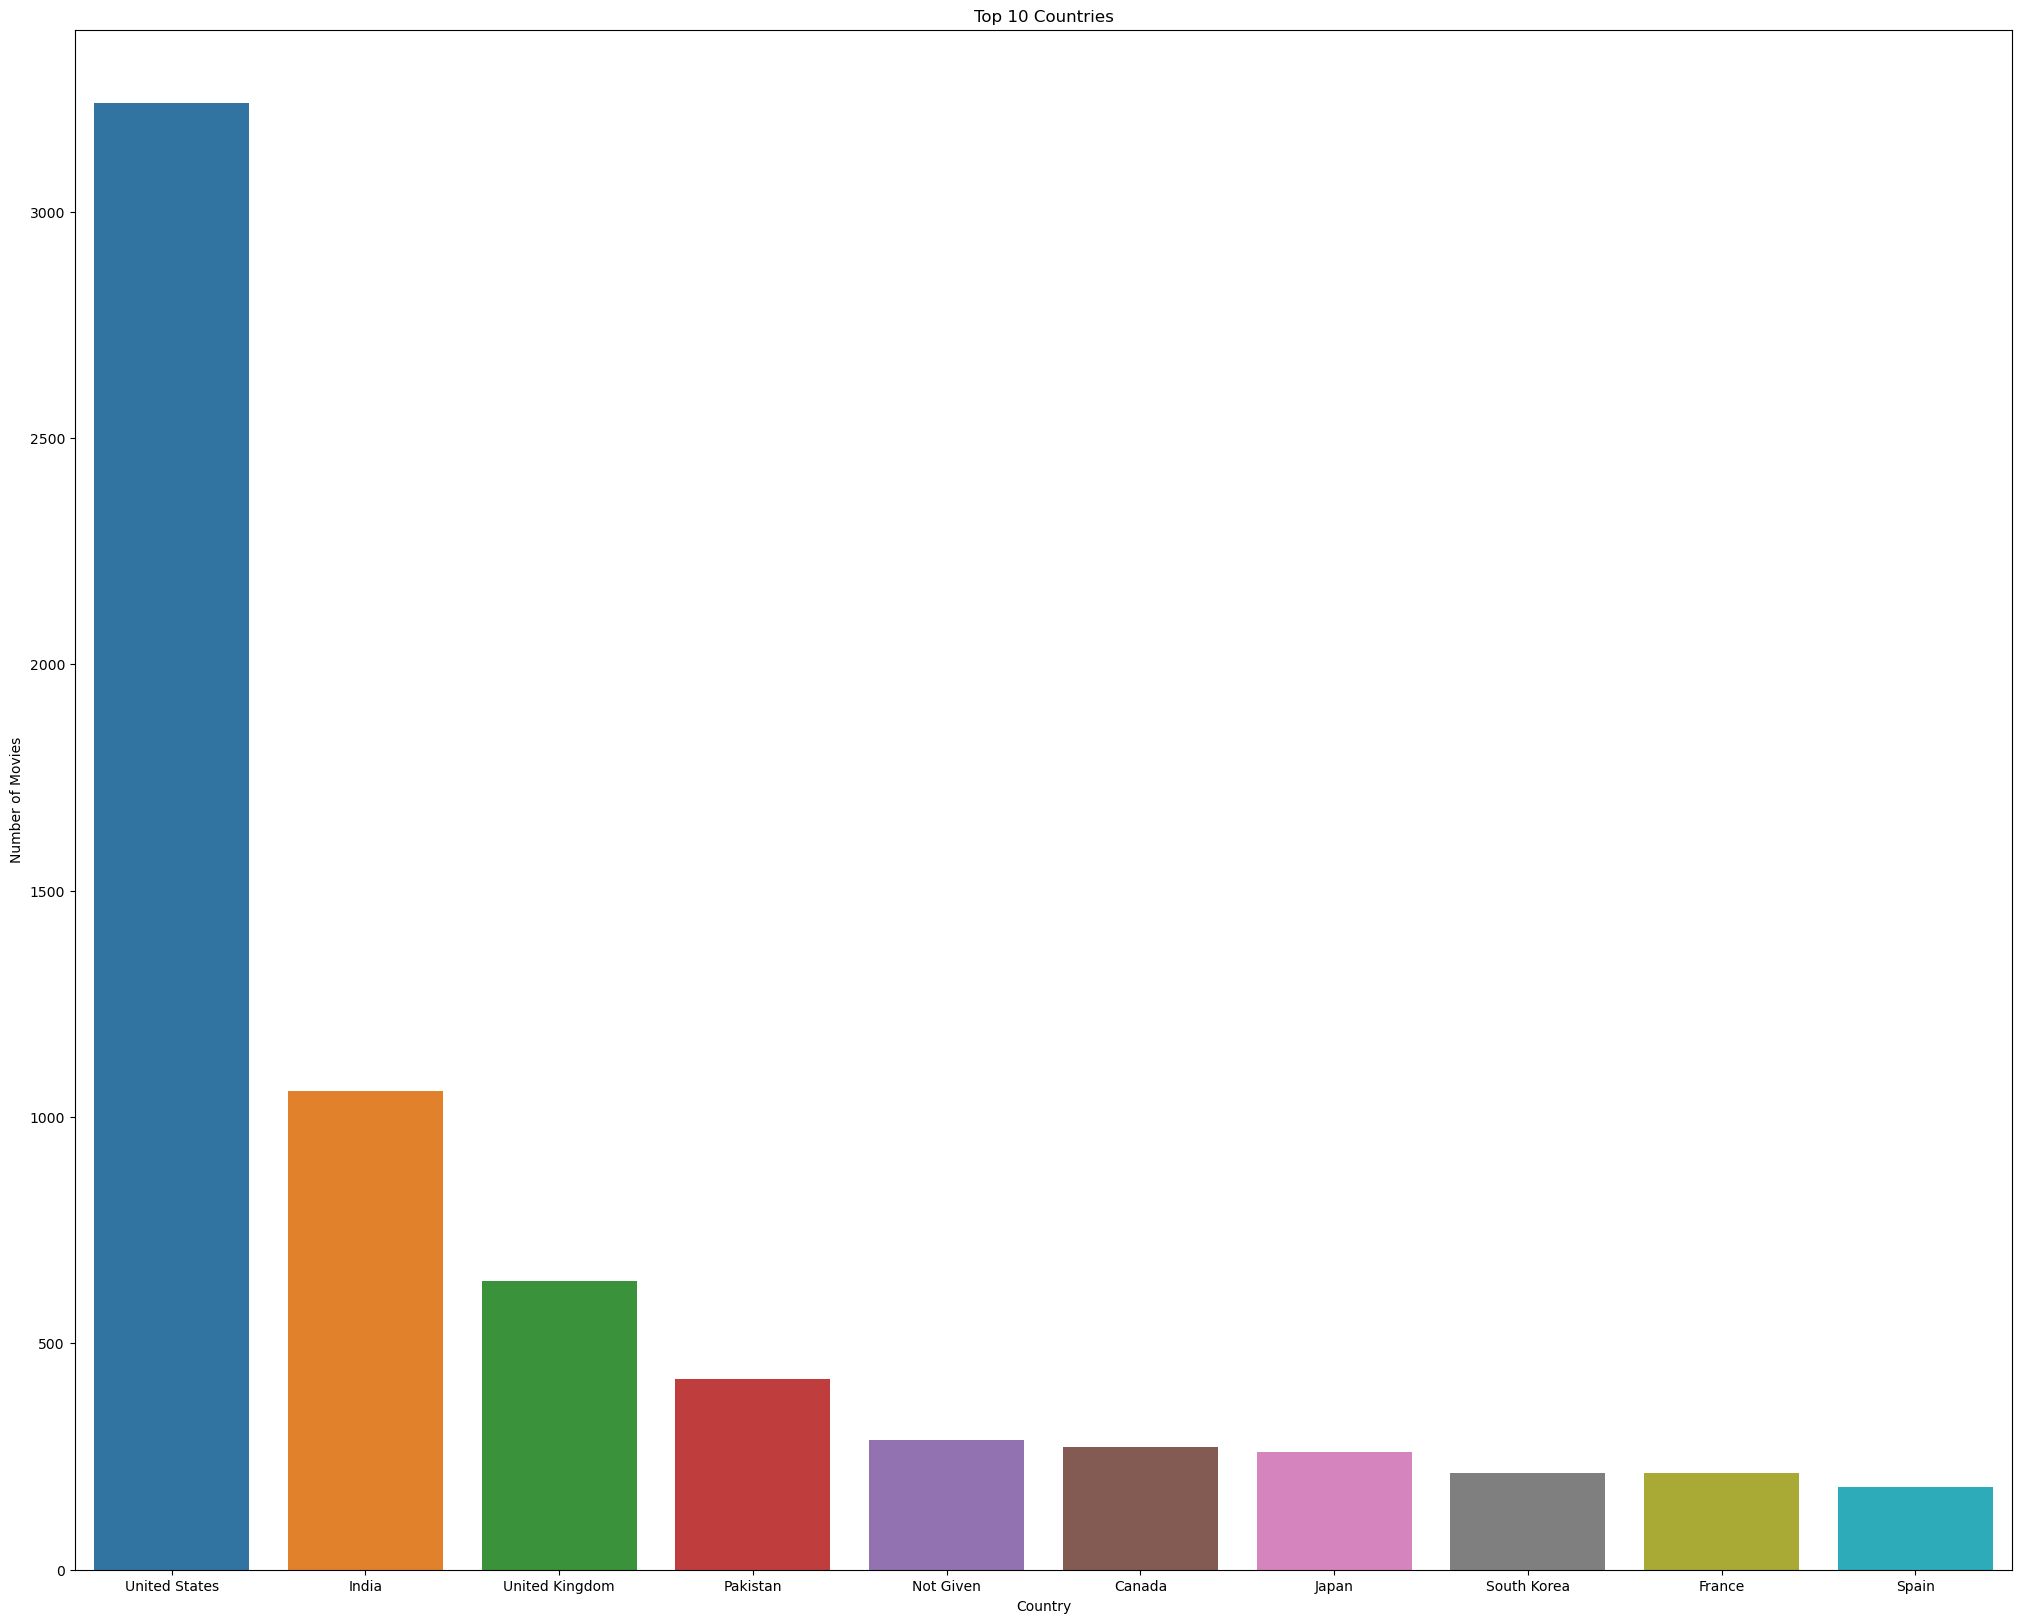

In [98]:
plt.figure(figsize=(25,20))
plt.title('Top 10 Countries')
sns.barplot(x='index',y='count',data=country_counts_top10)
plt.xlabel('Country')
plt.ylabel('Number of Movies')

# Top 10 Duration

In [110]:
durations=df.groupby(['duration','type'])['duration'].size().reset_index(name='count')
durations

,duration,type,count
0,1 Season,TV Show,1791
1,10 Seasons,TV Show,6
2,10 min,Movie,1
3,100 min,Movie,108
4,101 min,Movie,116
...,...,...,...
215,95 min,Movie,137
216,96 min,Movie,130
217,97 min,Movie,146
218,98 min,Movie,120


In [112]:
top10_movie_durations = durations[durations['type']=='Movie'].sort_values(by='count',ascending=False).iloc[0:10]
top10_movie_durations

,duration,type,count
210,90 min,Movie,152
213,93 min,Movie,146
214,94 min,Movie,146
217,97 min,Movie,146
211,91 min,Movie,144
215,95 min,Movie,137
216,96 min,Movie,130
212,92 min,Movie,129
5,102 min,Movie,122
218,98 min,Movie,120


<function matplotlib.pyplot.show(close=None, block=None)>

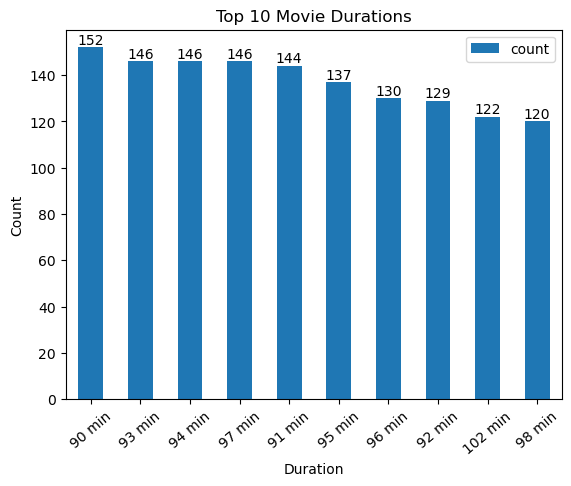

In [120]:
top10_movie_durations.plot(x='duration',y='count',kind='bar')
plt.title('Top 10 Movie Durations')
plt.xlabel('Duration')
plt.ylabel('Count')
plt.xticks(rotation=40)
#show number on each bar
for index, value in enumerate (top10_movie_durations['count']):
    plt.text(index,value,str(value),ha='center',va='bottom')
plt.show()

In [118]:
Top10_TV_Show_durations=durations[durations['type']=='TV Show'].sort_values(by='count',ascending = False).iloc[0:10]
Top10_TV_Show_durations

,duration,type,count
0,1 Season,TV Show,1791
110,2 Seasons,TV Show,421
138,3 Seasons,TV Show,198
151,4 Seasons,TV Show,94
162,5 Seasons,TV Show,64
174,6 Seasons,TV Show,33
185,7 Seasons,TV Show,23
196,8 Seasons,TV Show,17
208,9 Seasons,TV Show,9
1,10 Seasons,TV Show,6


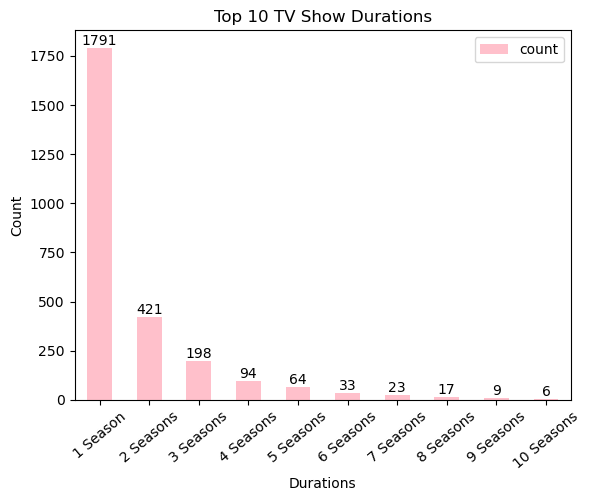

In [124]:
Top10_TV_Show_durations.plot(x='duration',y='count',kind='bar',color='pink')
plt.title("Top 10 TV Show Durations")
plt.xlabel('Durations')
plt.ylabel('Count')
plt.xticks(rotation=40)
for index, value in enumerate (Top10_TV_Show_durations['count']):
    plt.text(index,value,str(value),ha='center',va='bottom')
plt.show()

# Category

In [131]:
df = df.rename(columns={'listed_in':'category'})
print(df.columns)

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'category'],
      dtype='object')


In [133]:
category = df.groupby(['category', 'type']).size().reset_index(name='count')
category

,category,type,count
0,Action & Adventure,Movie,128
1,"Action & Adventure, Anime Features",Movie,1
2,"Action & Adventure, Anime Features, Children &...",Movie,4
3,"Action & Adventure, Anime Features, Classic Mo...",Movie,2
4,"Action & Adventure, Anime Features, Horror Movies",Movie,1
...,...,...,...
508,"TV Horror, TV Mysteries, Teen TV Shows",TV Show,1
509,"TV Horror, Teen TV Shows",TV Show,2
510,"TV Sci-Fi & Fantasy, TV Thrillers",TV Show,1
511,TV Shows,TV Show,16


In [135]:
Top10_category_in_movie = category[category['type'] == 'Movie'].sort_values(by='count', ascending=False).iloc[0:10]
Top10_category_in_movie

,category,type,count
325,"Dramas, International Movies",Movie,362
273,Documentaries,Movie,359
469,Stand-Up Comedy,Movie,334
199,"Comedies, Dramas, International Movies",Movie,274
318,"Dramas, Independent Movies, International Movies",Movie,252
120,Children & Family Movies,Movie,215
124,"Children & Family Movies, Comedies",Movie,201
280,"Documentaries, International Movies",Movie,186
328,"Dramas, International Movies, Romantic Movies",Movie,180
216,"Comedies, International Movies",Movie,176


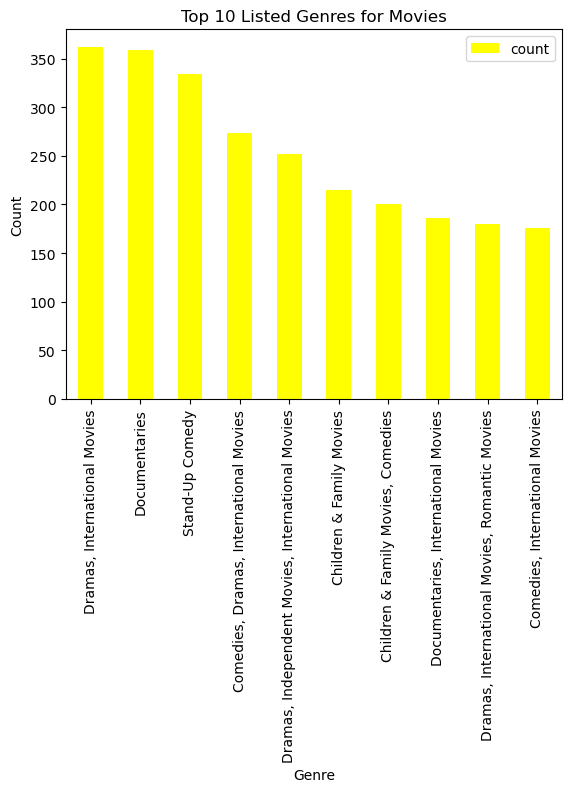

In [140]:
Top10_category_in_movie.plot(x='category',y='count',kind='bar',color='yellow')
plt.title('Top 10 Listed Genres for Movies')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()